# Проект урока 3. «Аналитика клиентов и логов gamedev-стартапа»

In [22]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Чтение данных  
logs = pd.read_csv('3_lesson_logs.csv')

In [3]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
logs.shape

(4500, 4)

In [5]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [6]:
# Чтение данных 
user_data = pd.read_csv('3_lesson_user_data.csv')

In [7]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [8]:
user_data.shape

(2954, 3)

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


> Стартап планирует выбрать амбассадоров продукта, чтобы через них продвигать игру. **Задача** — выявить наиболее активных клиентов, которые дают больше других верных ответов.

In [10]:
# Определим, какой клиент или клиенты дали наибольшее количество успешных ответов
success_counts = logs.loc[logs.success == True].client.value_counts()

In [14]:
max_num = success_counts.max()

In [15]:
# Определим их идентификаторы
success_counts.loc[success_counts == max_num].index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

In [16]:
# Выясним, с какой платформы было дано наибольшее количество успешных ответов
logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

> **Определим, какая платформа пользуется наибольшей популярностью среди премиум-клиентов**.

In [17]:
# Объединим датафреймы 
full_df = logs.merge(user_data, on='client')

In [18]:
full_df.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [19]:
# Определим самую популярную платформу 
full_df.loc[full_df.premium == True].platform.value_counts().idxmax()

'phone'

> **Визуализируем количество ответов премиум-клиентов на каждой платформе.**

In [20]:
platform_premium = full_df.loc[full_df.premium == True].platform.value_counts()

<BarContainer object of 3 artists>

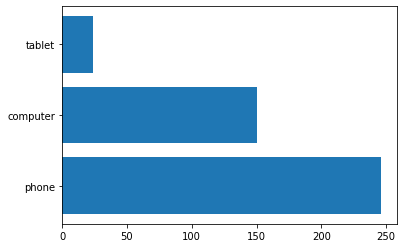

In [23]:
plt.barh(platform_premium.index, platform_premium.values)

> Посмотрим на долю неуспешных ответов от всего количества ответов — отдельно у премиум и обычных клиентов. **Определим, у какой категории клиентов доля неуспешных ответов выше**

In [24]:
success_premium = full_df.groupby(['premium', 'success'], as_index=False).agg({'client':'count'})\
    .pivot(index='premium', columns='success', values='client')

In [25]:
success_premium

success,False,True
premium,,
False,775,2244
True,117,303


In [26]:
success_premium['percent_unsuccessful'] = success_premium[False] / (success_premium[False] + success_premium[True])

In [27]:
success_premium

success,False,True,percent_unsuccessful
premium,,,
False,775,2244,0.256708
True,117,303,0.278571


> Посмотрим, как возраст премиум-клиентов отличается от возраста обычных. **Для сравнения распределения возраста у премиум и обычных клиентов построим две гистограммы**. 

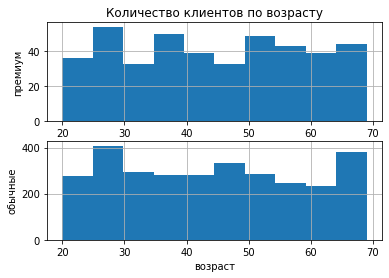

In [28]:
plt.subplot(2, 1, 1)
plt.hist(full_df.query('premium == True').age)
plt.title("Количество клиентов по возрасту")
plt.ylabel("премиум")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.hist(full_df.query('premium == False').age)
plt.xlabel("возраст")
plt.ylabel("обычные")
plt.grid(True)

> **Построим график, отражающий распределение количества успешных ответов на пользователя.**

In [29]:
success_count = logs.loc[logs.success == True].client.value_counts().rename('success')

In [30]:
import seaborn as sns

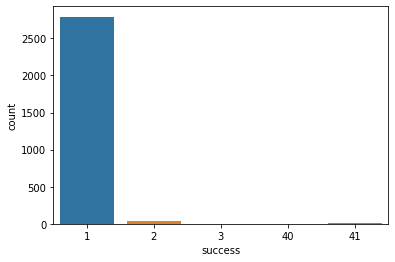

In [31]:
sns.countplot(x=success_count)

> Определим, **клиенты какого возраста дали наибольшее количество успешных ответов на компьютере** Визуализируем число успешных ответов, сделанных на платформе `computer`, в зависимости от возраста. 

In [32]:
success_computer = full_df.query('platform == "computer" and success == True')

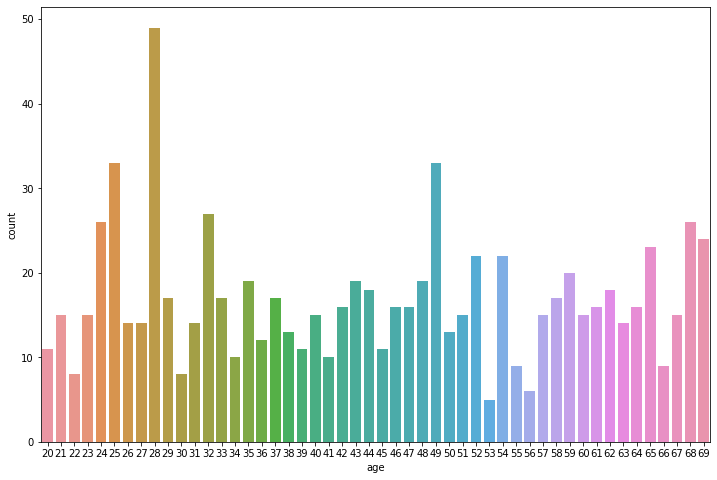

In [33]:
plt.figure(figsize =(12, 8))
sns.countplot(data=success_computer, x='age')